In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [129]:
df_train=pd.read_csv('Documents/GreyAtom/advertisement/train.csv')
df_test=pd.read_csv('Documents/GreyAtom/advertisement/test.csv')

In [130]:
df_train.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [131]:
df_test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [132]:
df_train.shape

(19536, 12)

In [133]:
df_test.shape

(6512, 11)

In [134]:
df_train.describe()

,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


In [135]:
df_test.describe()

,average_runtime(minutes_per_week),ratings
count,6512.000000,6512.000000
mean,40.049447,0.038385
std,12.466081,0.075497
min,1.000000,0.000000
25%,40.000000,0.027465
50%,40.000000,0.027465
75%,45.000000,0.027465
max,99.000000,1.000000


In [136]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             19536 non-null  object 
 1   realtionship_status                19536 non-null  object 
 2   industry                           19536 non-null  object 
 3   genre                              19536 non-null  object 
 4   targeted_sex                       19536 non-null  object 
 5   average_runtime(minutes_per_week)  19536 non-null  int64  
 6   airtime                            19536 non-null  object 
 7   airlocation                        19536 non-null  object 
 8   ratings                            19536 non-null  float64
 9   expensive                          19536 non-null  object 
 10  money_back_guarantee               19536 non-null  object 
 11  netgain                            19536 non-null  int

In [137]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             6512 non-null   object 
 1   realtionship_status                6512 non-null   object 
 2   industry                           6512 non-null   object 
 3   genre                              6512 non-null   object 
 4   targeted_sex                       6512 non-null   object 
 5   average_runtime(minutes_per_week)  6512 non-null   int64  
 6   airtime                            6512 non-null   object 
 7   airlocation                        6512 non-null   object 
 8   ratings                            6512 non-null   float64
 9   expensive                          6512 non-null   object 
 10  money_back_guarantee               6512 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 559.8+ 

In [138]:
df_train.nunique()

UserID                               19536
realtionship_status                      7
industry                                 6
genre                                    5
targeted_sex                             2
average_runtime(minutes_per_week)       89
airtime                                  3
airlocation                             42
ratings                                120
expensive                                3
money_back_guarantee                     2
netgain                                  2
dtype: int64

In [139]:
#checking for missing data
df_train.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [140]:
df_train.columns

Index(['UserID', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

## EDA

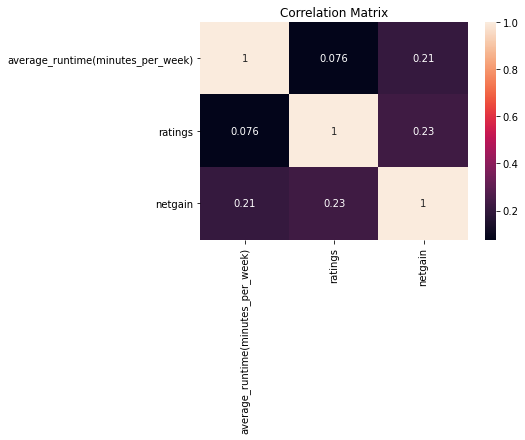

In [141]:
# checking the correlation between numerical columns
corr = df_train.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix", fontsize=12)
plt.show()

In [142]:
# Check all unique values for all the categorical columns
for col in df_train:
    if(df_train[col].dtypes == object):
        print(col," - ",df_train[col].unique())

UserID  -  ['UI_9185' 'UI_449' 'UI_9014' ... 'UI_9846' 'UI_10800' 'UI_2733']
realtionship_status  -  ['Married-civ-spouse' 'Never-married' 'Divorced' 'Separated' 'Widowed'
 'Married-spouse-absent' 'Married-AF-spouse']
industry  -  ['Pharma' 'Political' 'Auto' 'Other' 'Entertainment' 'ClassAction']
genre  -  ['Comedy' 'Infomercial' 'Drama' 'Direct' 'Other']
targeted_sex  -  ['Male' 'Female']
airtime  -  ['Daytime' 'Morning' 'Primetime']
airlocation  -  ['United-States' 'International' 'Mexico' 'Hong' 'Cuba' 'Germany' 'India'
 'Iran' 'Dominican-Republic' 'Philippines' 'Japan' 'Italy' 'South'
 'Poland' 'Vietnam' 'Columbia' 'Outlying-US(Guam-USVI-etc)' 'Puerto-Rico'
 'Hungary' 'El-Salvador' 'England' 'Taiwan' 'Canada' 'France' 'Guatemala'
 'Thailand' 'China' 'Jamaica' 'Portugal' 'Haiti' 'Yugoslavia' 'Nicaragua'
 'Honduras' 'Trinadad&Tobago' 'Ireland' 'Laos' 'Cambodia' 'Ecuador' 'Peru'
 'Scotland' 'Greece' 'Holand-Netherlands']
expensive  -  ['Medium' 'Low' 'High']
money_back_guarantee  -  

In [143]:
df_test['airlocation'].unique()

array(['United-States', 'Portugal', 'China', 'Poland', 'El-Salvador',
       'Taiwan', 'Guatemala', 'Jamaica', 'Mexico', 'England', 'Japan',
       'Ecuador', 'Vietnam', 'International', 'South', 'Ireland',
       'Philippines', 'Canada', 'Haiti', 'Cambodia', 'Columbia', 'Italy',
       'Dominican-Republic', 'Germany', 'Iran', 'Puerto-Rico', 'India',
       'Cuba', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Yugoslavia', 'Laos',
       'Honduras', 'Nicaragua', 'Hungary', 'Thailand', 'Scotland',
       'France', 'Greece', 'Hong', 'Holand-Netherlands'], dtype=object)

In [144]:
# Removing the entry with airlocation 'Trinadad&Tobago' as it is not in Test data, and would result in error while prediction
df_train = df_train[df_train['airlocation'] != 'Trinadad&Tobago']
df_train.airlocation.unique()

array(['United-States', 'International', 'Mexico', 'Hong', 'Cuba',
       'Germany', 'India', 'Iran', 'Dominican-Republic', 'Philippines',
       'Japan', 'Italy', 'South', 'Poland', 'Vietnam', 'Columbia',
       'Outlying-US(Guam-USVI-etc)', 'Puerto-Rico', 'Hungary',
       'El-Salvador', 'England', 'Taiwan', 'Canada', 'France',
       'Guatemala', 'Thailand', 'China', 'Jamaica', 'Portugal', 'Haiti',
       'Yugoslavia', 'Nicaragua', 'Honduras', 'Ireland', 'Laos',
       'Cambodia', 'Ecuador', 'Peru', 'Scotland', 'Greece',
       'Holand-Netherlands'], dtype=object)

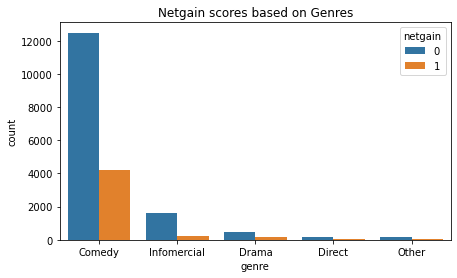

In [145]:
#comparing netgain based on genres
plt.figure(figsize=(7,4))
sns.countplot(df_train['genre'], hue=df_train['netgain'])
plt.title("Netgain scores based on Genres", fontsize=12)
plt.show()

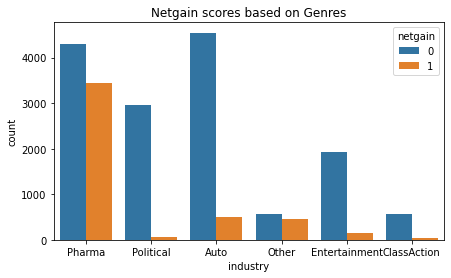

In [146]:
#comparing netgain based on industry
plt.figure(figsize=(7,4))
sns.countplot(df_train['industry'], hue=df_train['netgain'])
plt.title("Netgain scores based on Genres", fontsize=12)
plt.show()

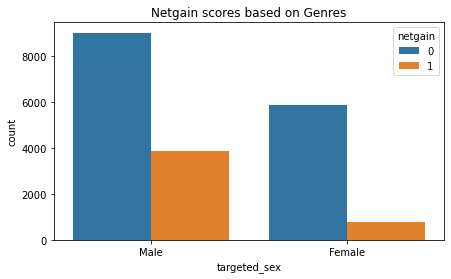

In [147]:
#comparing netgain based on sex
plt.figure(figsize=(7,4))
sns.countplot(df_train['targeted_sex'], hue=df_train['netgain'])
plt.title("Netgain scores based on Genres", fontsize=12)
plt.show()

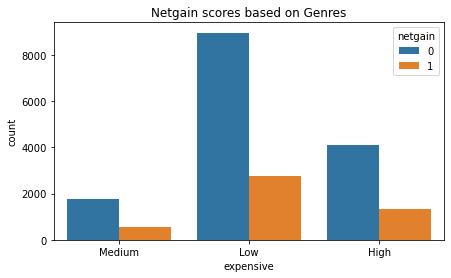

In [148]:
#comparing netgain based on expense
plt.figure(figsize=(7,4))
sns.countplot(df_train['expensive'], hue=df_train['netgain'])
plt.title("Netgain scores based on Genres", fontsize=12)
plt.show()

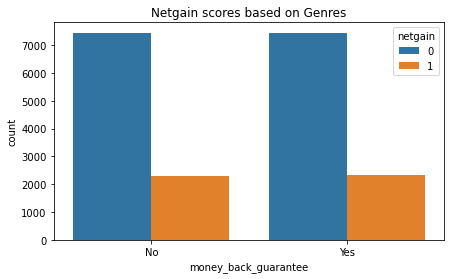

In [149]:
#comparing netgain based on expense
plt.figure(figsize=(7,4))
sns.countplot(df_train['money_back_guarantee'], hue=df_train['netgain'])
plt.title("Netgain scores based on Genres", fontsize=12)
plt.show()

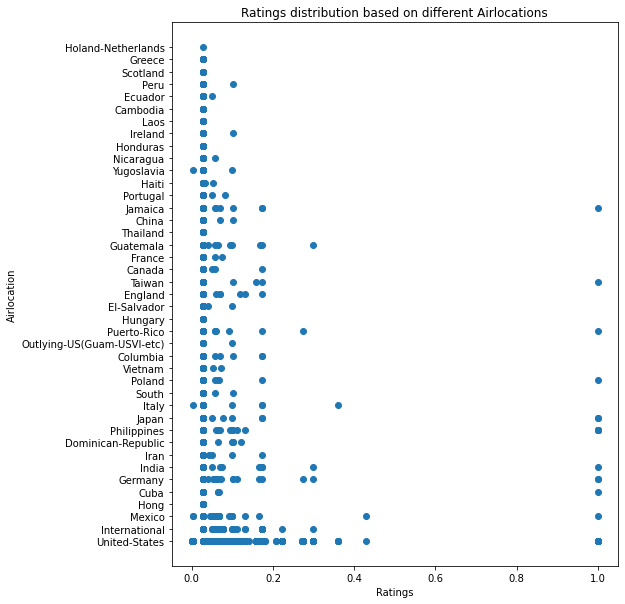

In [150]:
# scatterplot of ratings based on air locations 
plt.figure(figsize=(8,10))
plt.scatter(x = df_train['ratings'], y = df_train['airlocation'])
plt.title("Ratings distribution based on different Airlocations")
plt.ylabel('Airlocation')
plt.xlabel('Ratings')
plt.show()

In [151]:

# Lets convert the categorical columns into numeric to prepare data for model building
dummy = pd.get_dummies(df_train.drop(['UserID'], axis=1))
dummy.head()

,average_runtime(minutes_per_week),ratings,netgain,realtionship_status_Divorced,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,...,airlocation_Taiwan,airlocation_Thailand,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes
0,40,0.027465,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,35,0.027465,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,40,0.027465,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,40,0.027465,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,50,0.027465,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [152]:
#preprocessing data
# Let's remove 'UserID' from the data and convert all categorical data into numerical
test = pd.get_dummies(df_test.drop(['UserID'], axis=1))
test.head()

,average_runtime(minutes_per_week),ratings,realtionship_status_Divorced,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_Auto,...,airlocation_Taiwan,airlocation_Thailand,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes
0,40,0.027465,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,40,0.027465,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,40,0.027465,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,30,0.027465,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,70,0.027465,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [153]:

train2 = dummy.drop(['netgain'], axis=1)
test2 = dummy['netgain']
print(train2.shape, test2.shape)

(19519, 71) (19519,)


In [154]:
#Splitting the data using train_test_split function by importing a library
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train2,test2,test_size=0.3)

## Modelling


In [155]:
#importing modelling libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Logistic Regression

In [156]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)



LogisticRegression()

In [157]:
#accuracy score

# calculating the accuracy score on train data
log_train_pred = logreg.predict(x_train)
log_train_score= accuracy_score(y_train,log_train_pred)
print('Accuracy score on train data:',log_train_score)

# calculating the accuracy score on validation data
log_val_pred = logreg.predict(x_val)
log_val_score= accuracy_score(y_val,log_val_pred)
print('Accuracy score on validation data :',log_val_score)

Accuracy score on train data: 0.7944814462416746
Accuracy score on validation data : 0.7961065573770492


In [158]:
#F1 Score


# Calculating  F1 Score on train data
f1_train = f1_score(y_train, log_train_pred)
print("F1 score on train data : ", f1_train)


# Calculating the F1 score on validation data
f1_val = f1_score(y_val, log_val_pred)
print("F1 score on validation data : ", f1_val)

F1 score on train data :  0.4264705882352941
F1 score on validation data :  0.4335863377609108


### Decision Tree Classifier

In [159]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [160]:
#accuracy score

# calculating the accuracy score on train data
dtc_train_pred = dtc.predict(x_train)
dtc_train_score= accuracy_score(y_train,dtc_train_pred)
print('Accuracy score on train data :',dtc_train_score)

# calculating the accuracy score on validation data
dtc_val_pred = dtc.predict(x_val)
dtc_val_score = accuracy_score(y_val, dtc_val_pred)
print('Accuracy score on validation data : ', dtc_val_score)

Accuracy score on train data : 0.8682573373344068
Accuracy score on validation data :  0.7983265027322405


In [161]:
#F1 Score

# Calculating  F1 Score on train data
f1_train = f1_score(y_train, dtc_train_pred)
print("F1 score on train data : ", f1_train)

# Calculating the F1 score on validation data
f1_val = f1_score(y_val, dtc_val_pred)
print("F1 score on validation data : ", f1_val)

F1 score on train data :  0.6976822304333221
F1 score on validation data :  0.5322772277227723


### Predicting

In [165]:
predict = logreg.predict(test)


In [171]:
list(predict)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [175]:
submission = pd.DataFrame()
submission['netgain'] = predict
submission.to_csv('Documents/GreyAtom/advertisement/add_succ_submission.csv', index=False)